In [63]:
pip install -U tensorflow-addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
import tensorflow
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D,BatchNormalization,Add,Input,ReLU,ELU,LayerNormalization
from tensorflow_addons.layers import GroupNormalization

In [65]:
from keras.datasets import cifar10
(X_train,Y_train) , (X_test,Y_test) = cifar10.load_data()
cifar10_labels = ["airplane",
                 "automobile",
                 "bird",
                 "cat",
                 "deer",
                 "dog",
                 "frog",
                 "horse",
                 "ship",
                 "truck"]

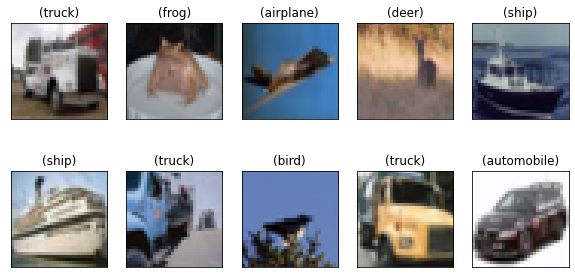

In [66]:
figure = plt.figure(figsize=(10, 5))
for i, index in enumerate(np.random.choice(X_train.shape[0], size = 10, replace = False)):
    img = figure.add_subplot(2, 5, i + 1, xticks = [], yticks = [])
    # Displaying each image
    img.imshow(np.squeeze(X_train[index]))
    true_index = (Y_train[index])[0]
    # Setting the title for each image
    img.set_title("({})".format(cifar10_labels[true_index]))

In [67]:
#Data_normalization
x_train = X_train.astype('float32') / 255
x_test = X_test.astype('float32') / 255
# # Converting RGB to Grayscale
# x_train = np.mean(x_train, axis=3)
# x_test= np.mean(x_test, axis=3)
#One hot encoding
y_train = keras.utils.to_categorical(Y_train, 10)
y_test = keras.utils.to_categorical(Y_test, 10)

In [68]:
# plt.subplot(1, 2, 1)
# plt.imshow(X_train[12])
# plt.title('(RGB)')
# plt.subplot(1, 2, 2)
# plt.imshow(x_train[12].reshape(32,32), cmap = 'gray')
# plt.title('(grayscale)')


In [69]:
x_train.shape

(50000, 32, 32, 3)

In [70]:
norm='group'
from keras import Model
from matplotlib.cbook import flatten
x1=Input((32,32,3))
x = Conv2D(32,(3,3),activation='elu',padding='same')(x1)
if norm=='batch': x = BatchNormalization()(x)
if norm=='layer': x = LayerNormalization()(x)
if norm=='group': x = GroupNormalization(32,axis=3)(x)
x = Conv2D(64,(3,3),padding='same')(x)
x = MaxPooling2D((2,2))(x)
x = ELU()(x)
r1=Conv2D(64,(3,3),activation='elu',padding='same')(x)
r1=Conv2D(64,(3,3),activation='elu',padding='same')(x)
L1=Add()([x,r1])
if norm=='batch': L1 = BatchNormalization()(L1)
if norm=='layer': L1 = LayerNormalization()(L1)
if norm=='group': L1 = GroupNormalization(32,axis=3)(L1)
L2=Conv2D(128,(3,3),padding='same')(L1)
L2=MaxPooling2D((2,2))(L2)
L2=ELU()(L2)
L2=Conv2D(256,(3,3),padding='same')(L2)
L2=MaxPooling2D((2,2))(L2)
L2=ELU()(L2)
r2=Conv2D(256,(3,3),activation='elu',padding='same')(L2)
r2=Conv2D(256,(3,3),activation='elu',padding='same')(r2)
L3=Add()([L2,r2])
if norm=='batch': L3 = BatchNormalization()(L3)
if norm=='layer': L3 = LayerNormalization()(L3)
if norm=='group': L3 = GroupNormalization(32,axis=3)(L3)
out=MaxPooling2D((3,3))(L3)
out=Flatten()(out)
out=Dense(10, activation="softmax")(out)
model=Model(x1,out)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_40 (Conv2D)             (None, 32, 32, 32)   896         ['input_6[0][0]']                
                                                                                                  
 group_normalization (GroupNorm  (None, 32, 32, 32)  64          ['conv2d_40[0][0]']              
 alization)                                                                                       
                                                                                                  
 conv2d_41 (Conv2D)             (None, 32, 32, 64)   18496       ['group_normalization[0][0]

In [71]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [72]:
import  time
startingPoint=time.time()
trainedModel = model.fit(x_train, y_train, batch_size = 512, epochs = 25,validation_split=0.3)

Epoch 1/25
69/69 [==============================] - 10s 128ms/step - loss: 2.3389 - accuracy: 0.2739 - val_loss: 1.8131 - val_accuracy: 0.3759
Epoch 2/25
69/69 [==============================] - 8s 111ms/step - loss: 1.6730 - accuracy: 0.4187 - val_loss: 1.5772 - val_accuracy: 0.4419
Epoch 3/25
69/69 [==============================] - 7s 107ms/step - loss: 1.4854 - accuracy: 0.4804 - val_loss: 1.6306 - val_accuracy: 0.4139
Epoch 4/25
69/69 [==============================] - 7s 106ms/step - loss: 1.3329 - accuracy: 0.5359 - val_loss: 1.4594 - val_accuracy: 0.4881
Epoch 5/25
69/69 [==============================] - 7s 106ms/step - loss: 1.2442 - accuracy: 0.5685 - val_loss: 1.2972 - val_accuracy: 0.5451
Epoch 6/25
69/69 [==============================] - 7s 105ms/step - loss: 1.1567 - accuracy: 0.5999 - val_loss: 1.2119 - val_accuracy: 0.5772
Epoch 7/25
69/69 [==============================] - 7s 104ms/step - loss: 1.0658 - accuracy: 0.6341 - val_loss: 1.2265 - val_accuracy: 0.5741
Epoch

In [73]:
total=time.time()-startingPoint
print('runtime=',total,'seconds')

runtime= 185.0170657634735 seconds


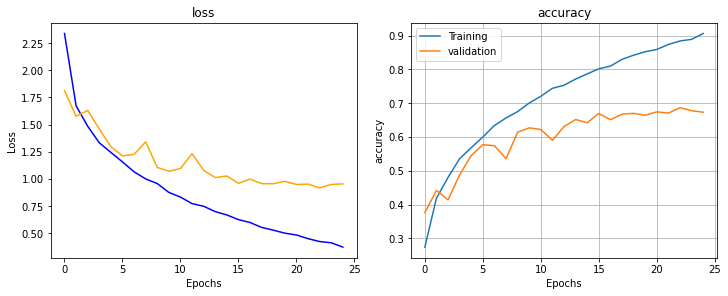

In [74]:
loss_train = trainedModel.history['loss']
loss_val = trainedModel.history['val_loss']
accu_train = trainedModel.history['accuracy']
accu_val = trainedModel.history['val_accuracy']
epochs=range(25)
f,ax=plt.subplots(1,2,figsize=(10,4),constrained_layout=True)
ax[0].plot(epochs, loss_train,color='blue', label='Training loss')
ax[0].plot(epochs, loss_val,color='orange', label='validation loss')
ax[0].set(title='loss',xlabel='Epochs',ylabel='Loss')
ax[1].plot(epochs, accu_train, label='Training')
ax[1].plot(epochs, accu_val, label='validation')
ax[1].set(title='accuracy',xlabel='Epochs',ylabel='accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test_loss:', test_loss)
print('Test_accuracy:', test_accuracy)

Test_loss: 0.9479763507843018
Test_accuracy: 0.6729000210762024
